# Mel spectrogram repetitive padding exploration


Import the necessary libraries


In [1]:

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import IPython.display as ipd

Set constant file paths


In [2]:
root_dir = '../data/'
test_set = 'test_dataset.csv'

Define the function to repetively pad the audio


In [3]:
def repeat_pad_audio(y, desired_length):
    """
    Repeat and pad the audio signal 'y' until it reaches the desired_length (in samples).
    """
    if len(y) >= desired_length:
        return y[:desired_length]
    # Calculate how many full repetitions of y we need
    full_reps = int(np.floor(desired_length / len(y)))
    # Calculate the number of samples needed from the next repetition
    remainder = desired_length - full_reps * len(y)
    # Repeat the audio and add the remaining part
    y_padded = np.concatenate([np.tile(y, full_reps), y[:remainder]])
    return y_padded

Select a random speech sample form the test dataset


In [4]:
df = pd.read_csv(os.path.join(root_dir, test_set))

# Check first few rows to confirm data is loaded correctly
print(df.head())

selected_row = df.sample(n=1)

random_filepath = os.path.join(
    root_dir, selected_row['Filepath'].iloc[0].replace('\\', '/'))

print(f'Random filepath: {random_filepath}')

   Id    Dataset                                           Filepath  \
0   0      MLEND          ./dataset/mlend\MLEndSND_Public\01620.wav   
1   1  JL-CORPUS  ./dataset/jl-corpus/Raw JL corpus (unchecked a...   
2   2      MLEND          ./dataset/mlend\MLEndSND_Public\04997.wav   
3   3        ESD        ./dataset/esd\0018\Surprise\0018_001454.wav   
4   4      MLEND          ./dataset/mlend\MLEndSND_Public\05521.wav   

             Filename   Ext  Duration   Emotion  
0           01620.wav  .wav  1.578957   Neutral  
1  male1_sad_5a_1.wav  .wav  2.350000       Sad  
2           04997.wav  .wav  1.172608  Question  
3     0018_001454.wav  .wav  2.836000  Surprise  
4           05521.wav  .wav  1.462857   Neutral  
Random filepath: ../data/./dataset/meld/train/dia546_utt7.mp4


Repetitively pad the randomly-selected speech sample


/var/folders/ft/gzvmkgdj727g157scc1xw9f80000gn/T/ipykernel_79113/3307041926.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(random_filepath, sr=16000)
/Users/limfuoen/anaconda3/envs/artificial-intelligence/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


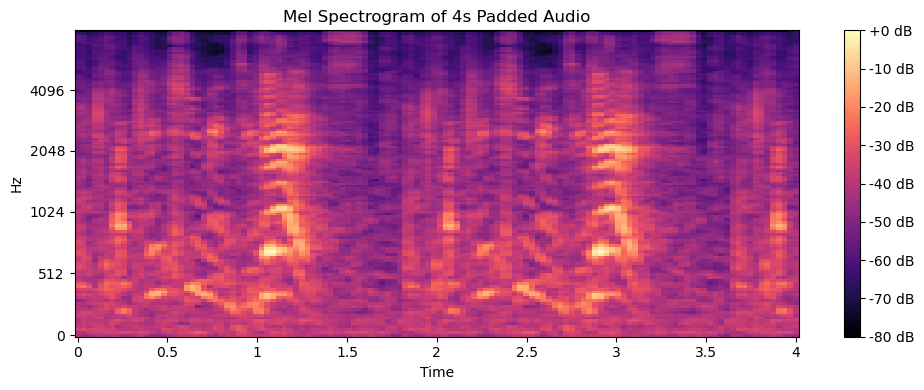

In [5]:
# Load your audio clip at a target sample rate (e.g., 16000 Hz)
y, sr = librosa.load(random_filepath, sr=16000)

# Calculate the desired total number of samples for 11 seconds
target_duration = 4  # seconds
target_length = int(target_duration * sr)

# Apply repetitive padding to create an 11-second audio clip
y_padded = repeat_pad_audio(y, target_length)

# Extract the mel spectrogram from the padded audio
melspectrogram = librosa.feature.melspectrogram(
    y=y_padded,
    sr=sr,
    n_fft=2048,
    hop_length=512,
    n_mels=128
)
melspectrogram_db = librosa.power_to_db(melspectrogram, ref=np.max)

# Plot and display the mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(melspectrogram_db, sr=sr,
                         hop_length=512, x_axis='time', y_axis='mel')
plt.title(f'Mel Spectrogram of {target_duration}s Padded Audio')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

# Create an audio player widget to play the padded audio
display(ipd.Audio(y_padded, rate=sr))